In [14]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.io
from scipy import signal

In [116]:
sample_length = 2 #second
N = 240 #Hz
N1 = 160 #Hz
N2 = 250 #Hz
# generate signal
t = np.arange(0,0.25,1/N)
t1 = np.arange(0,2,1/N1)
t2 = np.arange(0,0.25,1/N2)
y_t = np.cos(2*np.pi*10*t)*np.cos(2*np.pi*110*t)
y_t1 = np.cos(2*np.pi*10*t1)*np.cos(2*np.pi*110*t1)
y_t2 = np.cos(2*np.pi*10*t2)*np.cos(2*np.pi*110*t2)


Text(0.5, 1.0, 'x(t)=cos(2π 10t)*cos(2π 110t)')

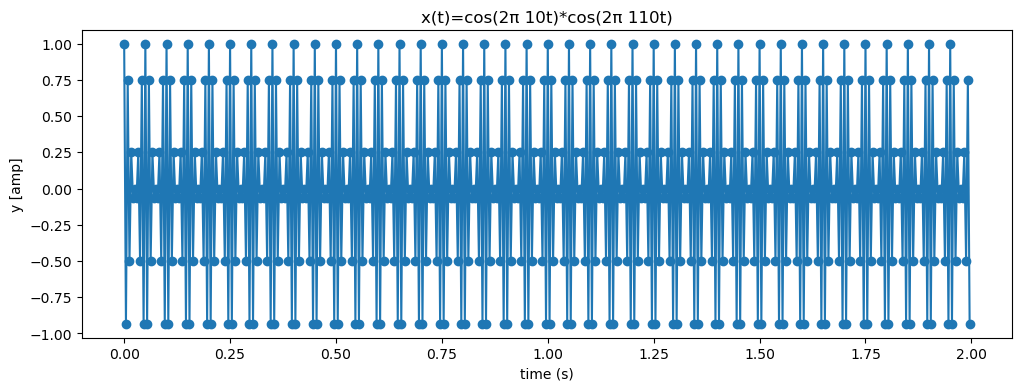

In [168]:
# plot signal N
fig, ax = plt.subplots(figsize=(12,4))
# print(f"y = {y_t}")
ax.plot(t, y_t, marker='o')
# ax.set_xticks(np.arange(0,4,1/N))
ax.set_xlabel("time (s)")
ax.set_ylabel("y [amp]")
ax.set_title("x(t)=cos(2\u03C0 10t)*cos(2\u03C0 110t)")

Text(0.5, 1.0, 'DFT of x(t)')

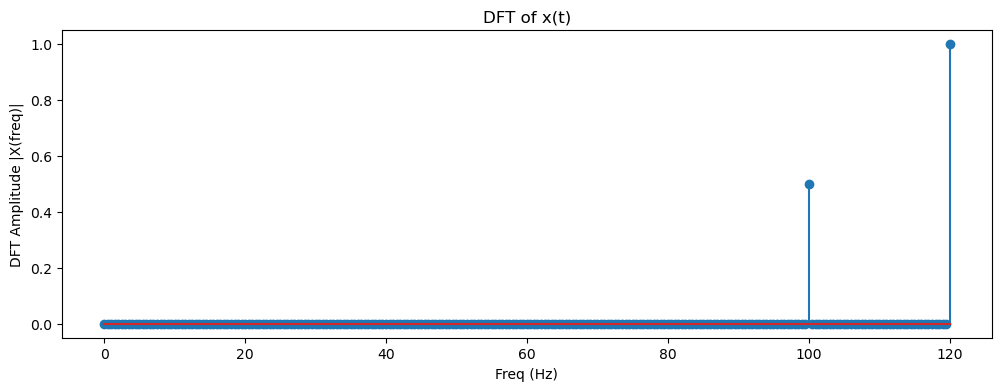

In [169]:
Y_f_long = np.fft.rfft(y_t)
# Y_f_long[0] = Y_f_long[0]
fig, ax = plt.subplots(figsize=(12,4))
ax.stem(np.arange(0,120.0001,1/2), np.absolute(Y_f_long)/240)
ax.set_xlabel('Freq (Hz)')
ax.set_ylabel('DFT Amplitude |X(freq)|')
ax.set_title("DFT of x(t)")

Text(0.5, 1.0, 'x(t) with 160Hz Sampling rate ')

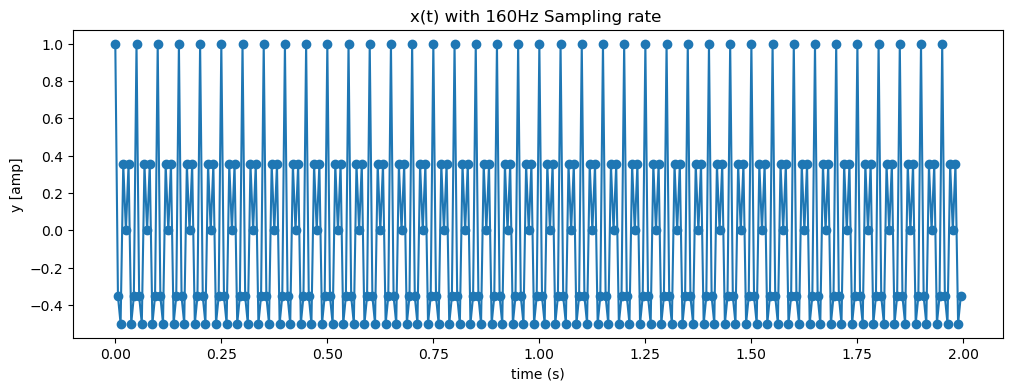

In [170]:
# plot signal N1
fig, ax = plt.subplots(figsize=(12,4))
ax.plot(t1, y_t1, marker='o')
ax.set_xlabel("time (s)")
ax.set_ylabel("y [amp]")
ax.set_title("x(t) with 160Hz Sampling rate ")

Text(0.5, 1.0, 'DFT of x(t) with 160Hz sampling rate')

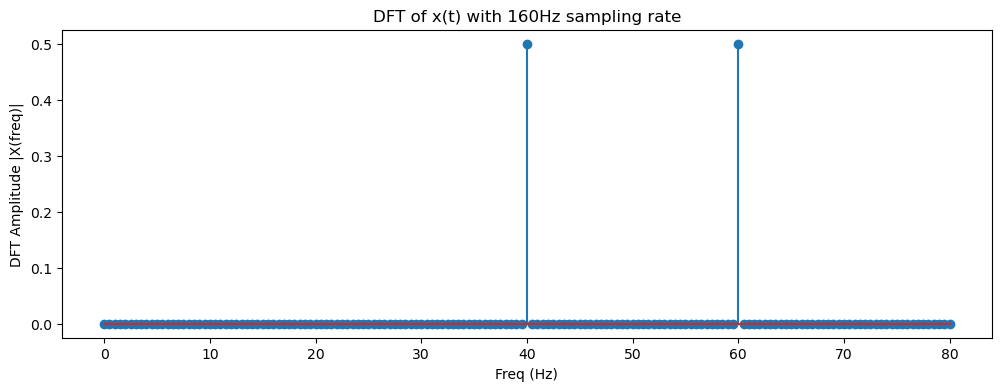

In [171]:
Y_f_long1 = np.fft.rfft(y_t1)
# Y_f_long[0] = Y_f_long[0]
fig, ax = plt.subplots(figsize=(12,4))
ax.stem(np.arange(0,80.1,1/2), np.absolute(Y_f_long1)/160)
ax.set_xlabel('Freq (Hz)')
ax.set_ylabel('DFT Amplitude |X(freq)|')
ax.set_title("DFT of x(t) with 160Hz sampling rate")

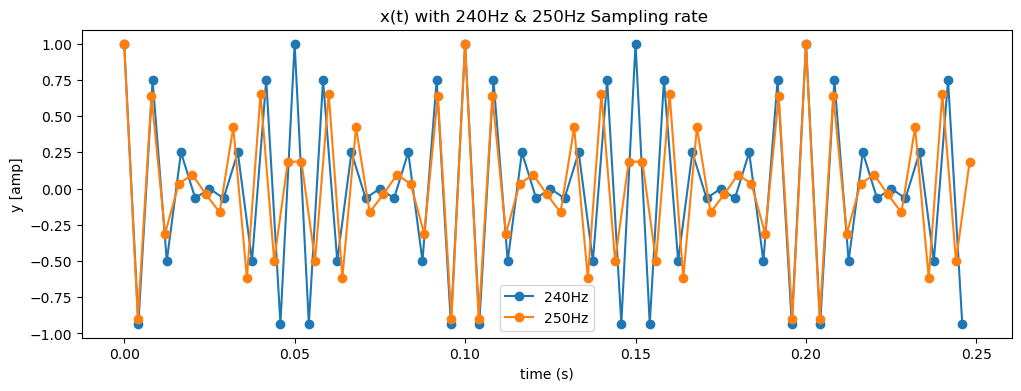

In [123]:
# plot signal N2
fig, ax = plt.subplots(figsize=(12,4))
ax.plot(t, y_t, marker='o', label='240Hz')
ax.plot(t2, y_t2, marker='o', label='250Hz')
# ax.plot(t2, y_t2, marker='o')

ax.set_xlabel("time (s)")
ax.set_ylabel("y [amp]")
ax.set_title("x(t) with 240Hz & 250Hz Sampling rate ")
ax.legend()

Text(0.5, 1.0, 'DFT of x(t) with 250Hz sampling rate')

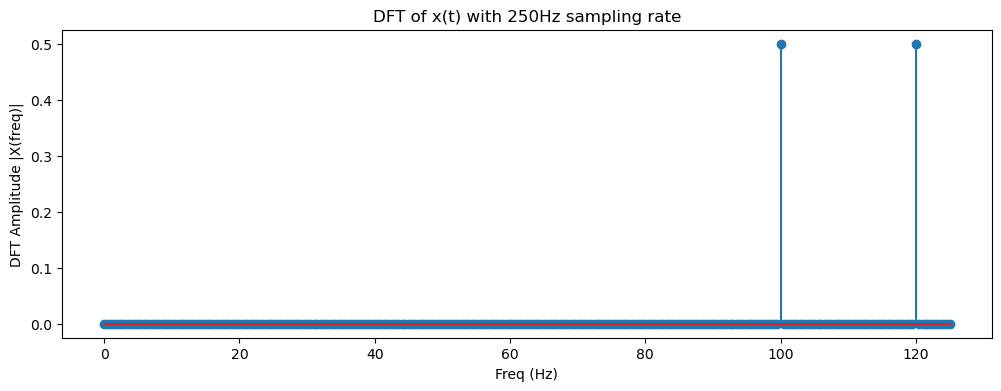

In [166]:
Y_f_long2 = np.fft.rfft(y_t2)
# Y_f_long[0] = Y_f_long[0]
fig, ax = plt.subplots(figsize=(12,4))
ax.stem(np.arange(0,125.1,1/2), np.absolute(Y_f_long2)/250)
ax.set_xlabel('Freq (Hz)')
ax.set_ylabel('DFT Amplitude |X(freq)|')
ax.set_title("DFT of x(t) with 250Hz sampling rate")

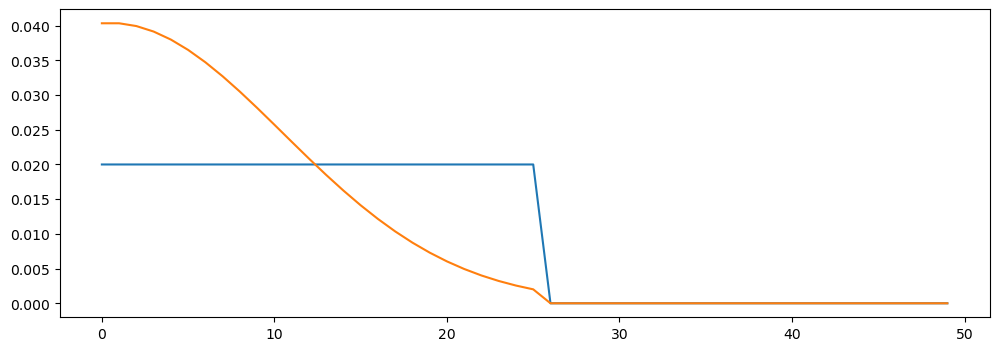

In [113]:
file = scipy.io.loadmat('filters.mat')
filtVec = file['filtVec']
dataVec = file['dataVec']
dataVec = dataVec.reshape(dataVec.shape[1])
filtVec, dataVec

time = np.linspace(0,1000)

impulse = np.zeros(50)
impulse[0]=1
impres1 = np.convolve(impulse,filtVec[0],mode='same')
impres2 = np.convolve(impulse,filtVec[1],mode='same')

fig, ax = plt.subplots(figsize=(12,4))
ax.plot(impres1)
ax.plot(impres2)



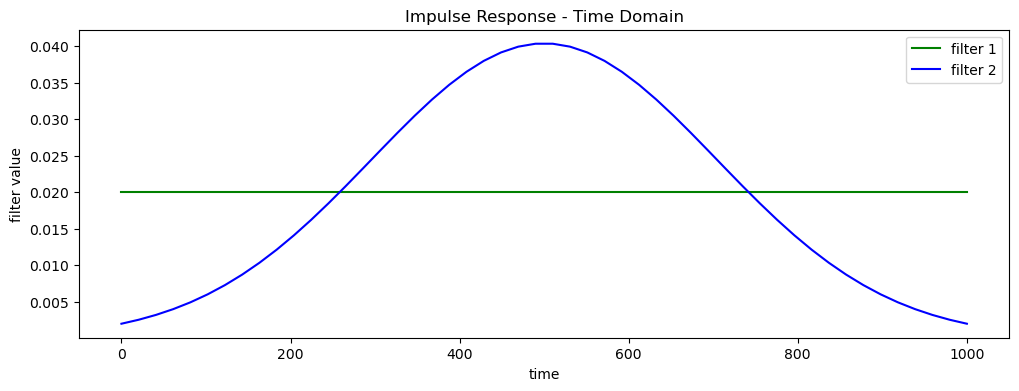

In [36]:
time = np.linspace(0,1000)

fig, ax = plt.subplots(figsize=(12,4))
ax.plot(time,filtVec[0],color="g", label="filter 1")
ax.plot(time,filtVec[1], color="blue", label="filter 2")
ax.set_ylabel('filter value')
ax.set_xlabel('time')
ax.set_title("Impulse Response - Time Domain")
ax.legend()


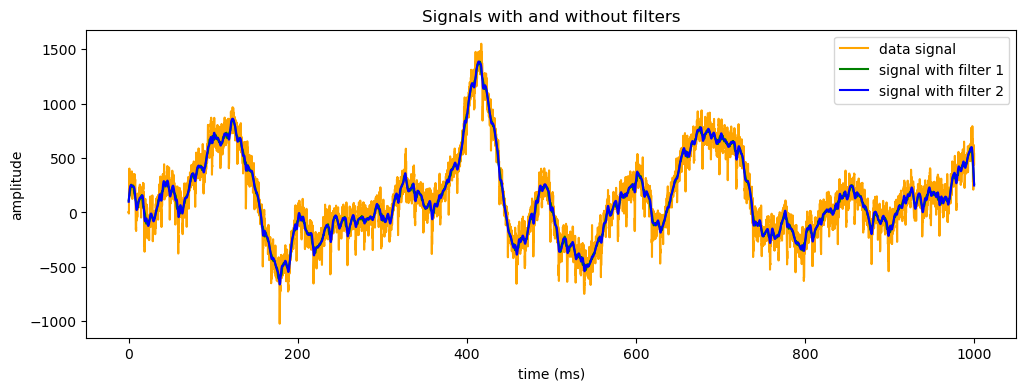

In [115]:
time = np.linspace(0,1000, 10000)
res1 = signal.convolve(dataVec,filtVec[0],mode='same')
res2 = signal.convolve(dataVec,filtVec[1],mode='same')


fig, ax = plt.subplots(figsize=(12,4))
ax.plot(time, dataVec, color='orange', label="data signal")
ax.plot(time,res1,color="g", label="signal with filter 1")
ax.plot(time,res2, color="b", label="signal with filter 2")
ax.set_ylabel('amplitude')
ax.set_xlabel('time (ms)')
ax.set_title("Signals with and without filters")
ax.legend()


[1.31684572e-02 8.31988529e-04 5.64545042e-03 ... 1.91842158e-05
 4.60226368e-05 2.92316668e-04]


array([658422.85872605    +0.j        , -29207.18800174+29621.82384637j,
       267420.89598754-90353.97258733j, ...,
          879.7734192   +382.20945808j,  -2133.02942489  -863.36157763j,
        14615.83338507    +0.j        ])

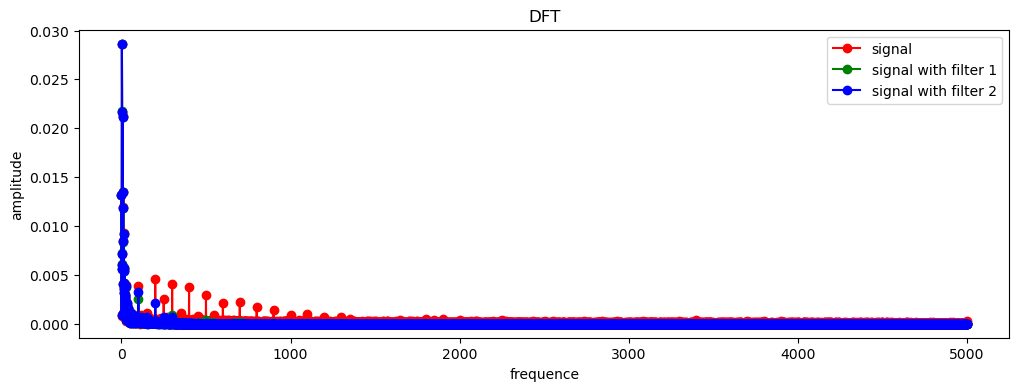

In [93]:
sr=10000
sample_length = len(dataVec)
dft = np.fft.rfft(dataVec)
dft[0] = dft[0]/2

dft1 = np.fft.rfft(res1)
dft1[0] = dft1[0]/2
dft2 = np.fft.rfft(res2)
dft2[0] = dft2[0]/2
print(np.absolute(dft)/(sr*sample_length/2))
y=np.absolute(dft)/(sr*sample_length/2)
y1=np.absolute(dft1)/(sr*sample_length/2)
y2=np.absolute(dft2)/(sr*sample_length/2)
fig, ax = plt.subplots(figsize=(12,4))
ax.plot(np.arange(0,5000.1,1), y,'o-', color = 'r', label='signal')
ax.plot(np.arange(0,5000.1,1), y1,'o-', color = 'g', label='signal with filter 1')
ax.plot(np.arange(0,5000.1,1), y2,'o-', color = 'b', label='signal with filter 2')
ax.set_ylabel('amplitude')
ax.set_xlabel('frequence')
ax.set_title("DFT")
ax.legend()


# Y_f_long[0] = Y_f_long[0]/2
# plt.stem(np.arange(0,3.1,1/4), np.absolute(Y_f_long)/12)
# plt.xlabel('Freq (Hz)')
# plt.ylabel('DFT Amplitude |X(freq)|')
dft

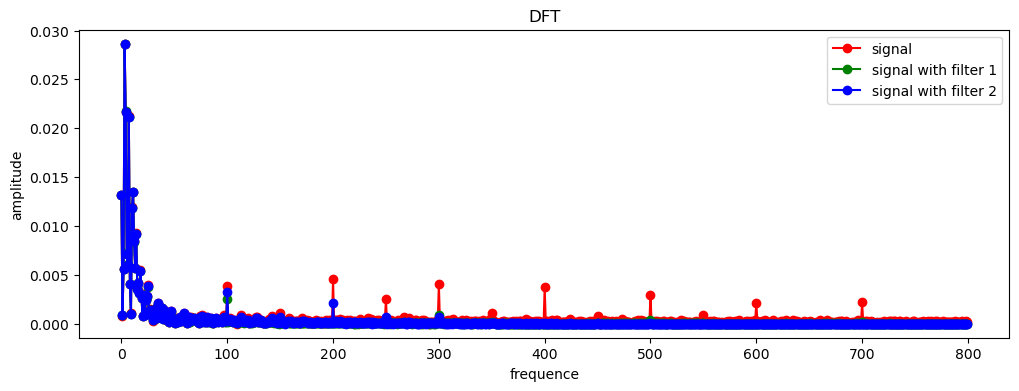

In [96]:
fig, ax = plt.subplots(figsize=(12,4))
ax.plot(np.arange(0,5000.1,1)[0:800], y[0:800],'o-', color = 'r', label='signal')
ax.plot(np.arange(0,5000.1,1)[0:800], y1[0:800],'o-', color = 'g', label='signal with filter 1')
ax.plot(np.arange(0,5000.1,1)[0:800], y2[0:800],'o-', color = 'b', label='signal with filter 2')
ax.set_ylabel('amplitude')
ax.set_xlabel('frequence')
ax.set_title("DFT")
ax.legend()



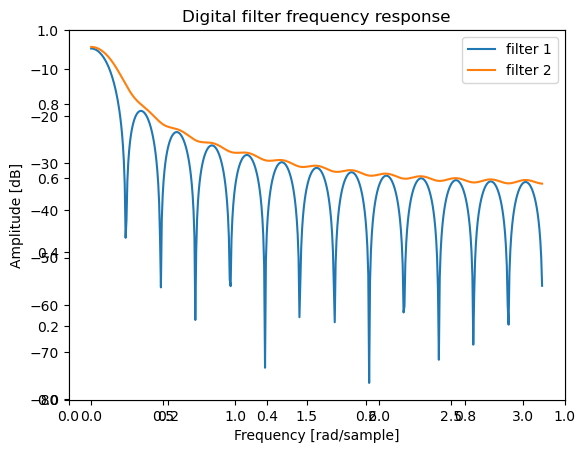

In [106]:
impulse = np.zeros(50)
impulse[
plt.legend()

array([-1.33273162e-05, -2.70019765e-05,  4.66576921e-05,  7.37989478e-05,
       -1.10145608e-04, -1.57644341e-04,  2.18479272e-04,  2.95082069e-04,
       -3.90141861e-04, -5.06615552e-04,  6.47739335e-04,  8.17042535e-04,
       -1.01836525e-03, -1.25588176e-03,  1.53413234e-03,  1.85806678e-03,
       -2.23310434e-03, -2.66521596e-03,  3.16103712e-03,  3.72802248e-03,
       -4.37465793e-03, -5.11075236e-03,  5.94784098e-03,  6.89974778e-03,
       -7.98337829e-03, -9.21985328e-03,  1.06361589e-02,  1.22676005e-02,
       -1.41615486e-02, -1.63833327e-02,  1.90258667e-02,  2.22260702e-02,
       -2.61944284e-02, -3.12718302e-02,  3.80484002e-02,  4.76407472e-02,
       -6.24444580e-02, -8.86925061e-02,  1.49247170e-01,  4.49894529e-01,
        4.49894529e-01,  1.49247170e-01, -8.86925061e-02, -6.24444580e-02,
        4.76407472e-02,  3.80484002e-02, -3.12718302e-02, -2.61944284e-02,
        2.22260702e-02,  1.90258667e-02, -1.63833327e-02, -1.41615486e-02,
        1.22676005e-02,  

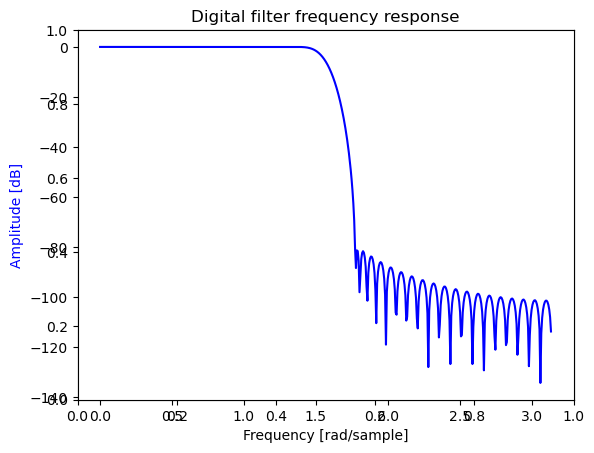

In [18]:
b = signal.firwin(80, 0.5, window=('kaiser', 8))
w, h = signal.freqz(b)
fig = plt.figure()
plt.title('Digital filter frequency response')
ax1 = fig.add_subplot(111)
plt.plot(w, 20 * np.log10(abs(h)), 'b')
plt.ylabel('Amplitude [dB]', color='b')
plt.xlabel('Frequency [rad/sample]')


(array([0.        , 0.00613592, 0.01227185, 0.01840777, 0.02454369,
        0.03067962, 0.03681554, 0.04295146, 0.04908739, 0.05522331,
        0.06135923, 0.06749515, 0.07363108, 0.079767  , 0.08590292,
        0.09203885, 0.09817477, 0.10431069, 0.11044662, 0.11658254,
        0.12271846, 0.12885439, 0.13499031, 0.14112623, 0.14726216,
        0.15339808, 0.159534  , 0.16566993, 0.17180585, 0.17794177,
        0.18407769, 0.19021362, 0.19634954, 0.20248546, 0.20862139,
        0.21475731, 0.22089323, 0.22702916, 0.23316508, 0.239301  ,
        0.24543693, 0.25157285, 0.25770877, 0.2638447 , 0.26998062,
        0.27611654, 0.28225246, 0.28838839, 0.29452431, 0.30066023,
        0.30679616, 0.31293208, 0.319068  , 0.32520393, 0.33133985,
        0.33747577, 0.3436117 , 0.34974762, 0.35588354, 0.36201947,
        0.36815539, 0.37429131, 0.38042724, 0.38656316, 0.39269908,
        0.398835  , 0.40497093, 0.41110685, 0.41724277, 0.4233787 ,
        0.42951462, 0.43565054, 0.44178647, 0.44

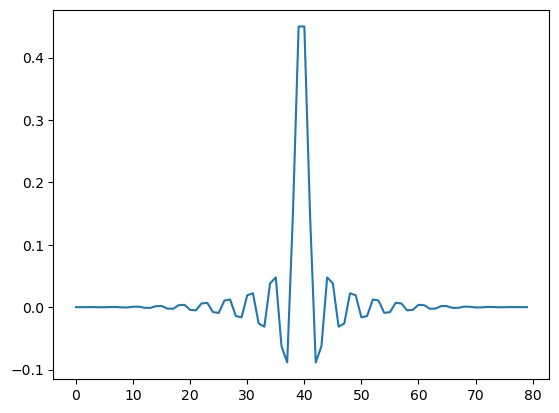

In [20]:
plt.plot(b)
w,h

In [128]:
file = scipy.io.loadmat('coherence.mat')
back_act = file['fwrsig_nospikes']
neuron_act = file['st']
neuron_act = neuron_act.toarray()

fs = 24038
len(back_act[0]), neuron_act

(1416886, array([[1., 0., 0., ..., 0., 0., 1.]]))

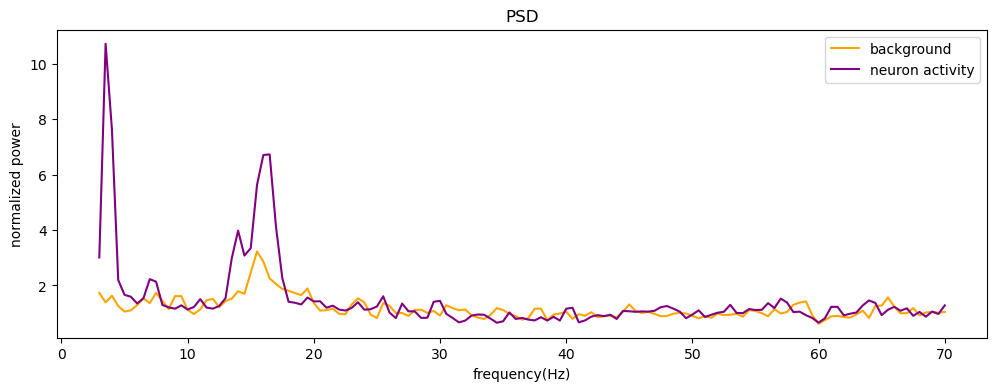

In [173]:
fback, spback = signal.welch(back_act, fs, noverlap=0, scaling='density', return_onesided=True, nperseg=2*fs)
norm_spback = spback[0] / (np.mean(spback[0][61:141]))

fnact, spnact = signal.welch(neuron_act, fs, noverlap=0, scaling='density', return_onesided=True, nperseg=2*fs)
norm_spnact = spnact[0] / (np.mean(spnact[0][61:141]))


fig, ax = plt.subplots(figsize=(12,4))
ax.plot(fback[6:141], norm_spback[6:141],color='orange', label="background")
ax.plot(fnact[6:141], norm_spnact[6:141],color='purple', label="neuron activity")
ax.set_xlabel('frequency(Hz)')
ax.set_ylabel('normalized power')
ax.set_title('PSD')
ax.legend()

# norm_spback

In [167]:
norm_spback

array([0.3176076 , 1.53814599, 1.82968918, ..., 0.01495152, 0.01327846,
       0.00598811])

In [192]:
m_spback = np.mean(norm_spback[6:141])
s_spback = np.std(norm_spback[6:141])

m_spnact = np.mean(norm_spnact[6:141])
s_spnact = np.std(norm_spnact[6:141])

impback = fback[norm_spback > (m_spback + (5*s_spback))]
impnact = fnact[norm_spnact > (m_spnact + (5*s_spnact))]
impback, impnact, fback, fnact
# norm_spnact > (m_spnact + (5*s_spnact))

(array([15.5]),
 array([3.5]),
 array([0.00000e+00, 5.00000e-01, 1.00000e+00, ..., 1.20180e+04,
        1.20185e+04, 1.20190e+04]),
 array([0.00000e+00, 5.00000e-01, 1.00000e+00, ..., 1.20180e+04,
        1.20185e+04, 1.20190e+04]))

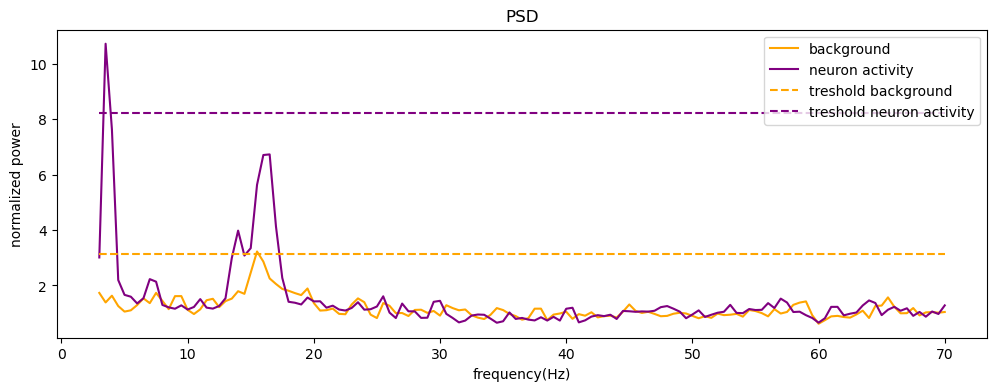

In [194]:
fig, ax = plt.subplots(figsize=(12,4))
ax.plot(fback[6:141], norm_spback[6:141],color='orange', label="background")
ax.plot(fnact[6:141], norm_spnact[6:141],color='purple', label="neuron activity")
ax.hlines(y=m_spback + (5*s_spback), xmin=3, xmax=70, color="orange", linestyles='--', label="treshold background")
ax.hlines(y=m_spnact + (5*s_spnact), xmin=3, xmax=70, color="purple", linestyles='--', label="treshold neuron activity")


ax.set_xlabel('frequency(Hz)')
ax.set_ylabel('normalized power')
ax.set_title('PSD')
ax.legend()


Text(0.5, 1.0, 'Cross-Spectrum Density')

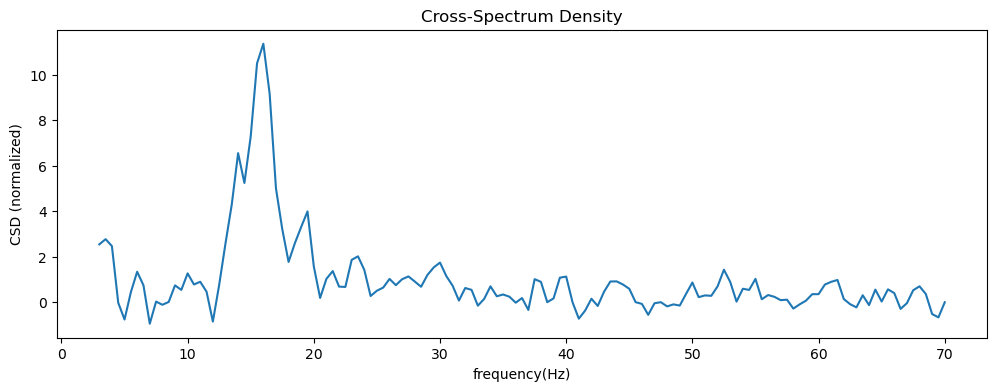

In [204]:
f, p = signal.csd(back_act,neuron_act,fs,noverlap=0, scaling='density', return_onesided=True, nperseg=2*fs)
norm_p = p[0] / (np.mean(p[0][6:141]))


fig, ax = plt.subplots(figsize=(12,4))
ax.plot(f[6:141],norm_p[6:141], label="background")
# ax.plot(fnact[6:141], norm_spnact[6:141],color='purple', label="neuron activity")
ax.set_xlabel('frequency(Hz)')
ax.set_ylabel('CSD (normalized)')
ax.set_title('Cross-Spectrum Density')



Text(0.5, 1.0, 'Coherence')

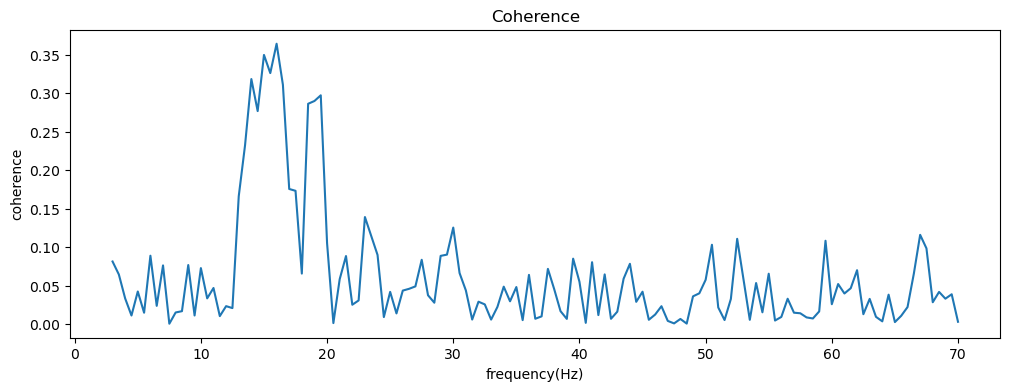

In [210]:
f, p = signal.coherence(back_act,neuron_act,fs,noverlap=0, nperseg=2*fs)
norm_p = p[0] / (np.mean(p[0][6:141]))


fig, ax = plt.subplots(figsize=(12,4))
ax.plot(f[6:141],np.abs(p[0][6:141]), label="background")
# ax.plot(fnact[6:141], norm_spnact[6:141],color='purple', label="neuron activity")
ax.set_xlabel('frequency(Hz)')
ax.set_ylabel('coherence')
ax.set_title('Coherence')

